Token -> Index mapping:

king       -> 0
queen      -> 1
prince     -> 2
princess   -> 3
man        -> 4
woman      -> 5
boy        -> 6
girl       -> 7
apple      -> 8
orange     -> 9
banana     -> 10
grape      -> 11
car        -> 12
bus        -> 13
train      -> 14
bike       -> 15
dog        -> 16
cat        -> 17
lion       -> 18
tiger      -> 19

Example Embeddings:

king    : [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473]
queen   : [-0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024
 -1.72491783 -0.56228753]
apple   : [ 0.81252582  1.35624003 -0.07201012  1.0035329   0.36163603 -0.64511975
  0.36139561  1.53803657]
car     : [ 0.29612028  0.26105527  0.00511346 -0.23458713 -1.41537074 -0.42064532
 -0.34271452 -0.80227727]
dog     : [ 0.09965137 -0.50347565 -1.55066343  0.06856297 -1.06230371  0.47359243
 -0.91942423  1.54993441]

Cosine Similarities:

king   <-> queen  : -0.581
apple  <-> banana : 0.101
ca

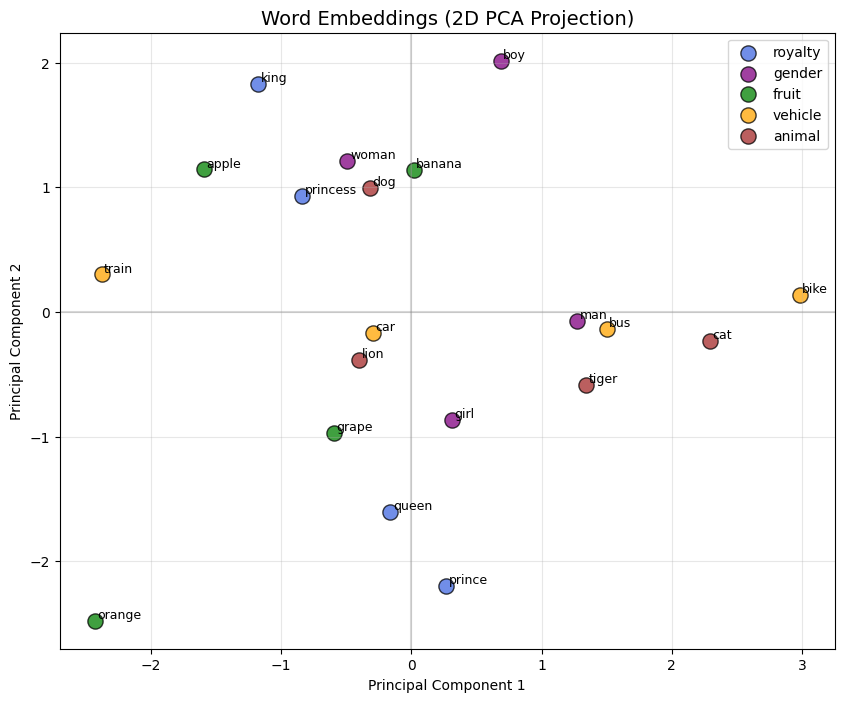

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. vocabulary
vocab = [
    # royalty
    "king", "queen", "prince", "princess",
    # gender
    "man", "woman", "boy", "girl",
    # fruits
    "apple", "orange", "banana", "grape",
    # vehicles
    "car", "bus", "train", "bike",
    # animals
    "dog", "cat", "lion", "tiger"
]

vocab_size = len(vocab)
embedding_dim = 8

# 2. Token -> Index Mapping
token_to_idx = {token: i for i, token in enumerate(vocab)}
idx_to_token = {i: token for token, i in token_to_idx.items()}

print("Token -> Index mapping:\n")
for k, v in token_to_idx.items():
    print(f"{k:<10} -> {v}")

# 3. Embedding Matrix
embedding_matrix = np.random.randn(vocab_size, embedding_dim)

# 4. Lookup Function
def get_embedding(token):
    idx = token_to_idx[token]
    return embedding_matrix[idx]

print("\nExample Embeddings:\n")
for word in ["king", "queen", "apple", "car", "dog"]:
    print(f"{word:<8}: {get_embedding(word)}")

# 5. Cosine Similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("\nCosine Similarities:\n")
pairs = [("king", "queen"), ("apple", "banana"), ("car", "dog")]
for w1, w2 in pairs:
    sim = cosine_similarity(get_embedding(w1), get_embedding(w2))
    print(f"{w1:<6} <-> {w2:<7}: {sim:.3f}")

# 6. PCA
X = embedding_matrix
X_centered = X - X.mean(axis=0)

cov = np.cov(X_centered.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, idx]

x_2d = X_centered @ eig_vecs[:, :2]

# 7. Visualization
plt.figure(figsize=(10,8))

groups = {
    "royalty": ["king","queen","prince","princess"],
    "gender": ["man","woman","boy","girl"],
    "fruit": ["apple","orange","banana","grape"],
    "vehicle": ["car","bus","train","bike"],
    "animal": ["dog","cat","lion","tiger"]
}

colors = {
    "royalty": "royalblue",
    "gender": "purple",
    "fruit": "green",
    "vehicle": "orange",
    "animal": "brown"
}

for group, words in groups.items():
    indices = [token_to_idx[w] for w in words]
    plt.scatter(
        X_2d[indices,0],
        X_2d[indices,1],
        c=colors[group],
        label=group,
        s=120,
        alpha=0.75,
        edgecolors="k"
    )

    for i in indices:
        plt.text(
            X_2d[i,0] + 0.02,
            X_2d[i,1] + 0.02,
            idx_to_token[i],
            fontsize=9
        )

plt.axhline(0, color="gray", alpha=0.3)
plt.axvline(0, color="gray", alpha=0.3)

plt.title("Word Embeddings (2D PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()